In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
athletes_df = pd.read_csv('athlete_events.csv')
noc_df = pd.read_csv('country_definitions.csv')

In [13]:
merged_df = pd.merge(athletes_df, noc_df, on='NOC', how='left')
merged_df = merged_df.drop('notes', axis=1)
merged_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands


In [14]:
# Analyze and visualize the % of athletes who were female over time.

In [15]:
countsFem = merged_df.groupby(['Year', 'Sex'])['ID'].count().unstack()
countsFem['female_percent'] = countsFem['F'] / (countsFem['F'] + countsFem['M']) * 100

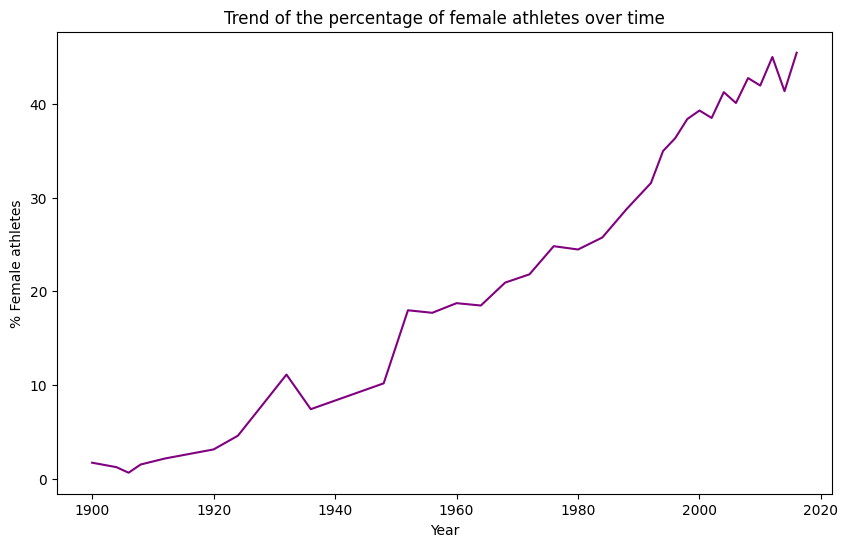

In [16]:
ax = countsFem['female_percent'].plot(kind='line', figsize=(10, 6), color='purple')
ax.set_xlabel('Year')
ax.set_ylabel('% Female athletes')
ax.set_title('Trend of the percentage of female athletes over time')
plt.show()

In [19]:
countsMale = merged_df.groupby(['Year', 'Sex'])['ID'].count().unstack()
countsMale['male_percent'] = countsMale['M'] / (countsMale['M'] + countsFem['F']) * 100

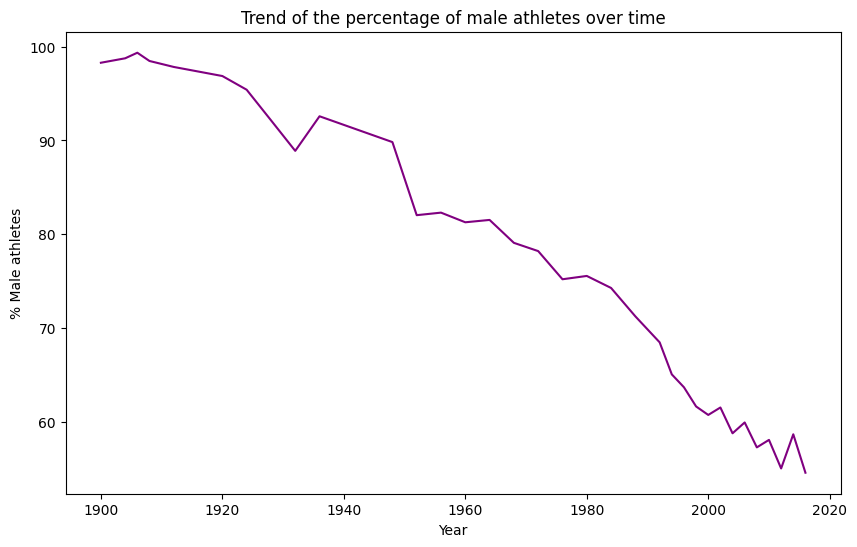

In [20]:
ax = countsMale['male_percent'].plot(kind='line', figsize=(10, 6), color='purple')
ax.set_xlabel('Year')
ax.set_ylabel('% Male athletes')
ax.set_title('Trend of the percentage of male athletes over time')
plt.show()

In [21]:
counts = merged_df.groupby(['Year', 'Sex'])['ID'].count().unstack()
counts['female_percent'] = counts['F'] / (counts['F'] + counts['M']) * 100
counts['male_percent'] = counts['M'] / (counts['F'] + counts['M']) * 100

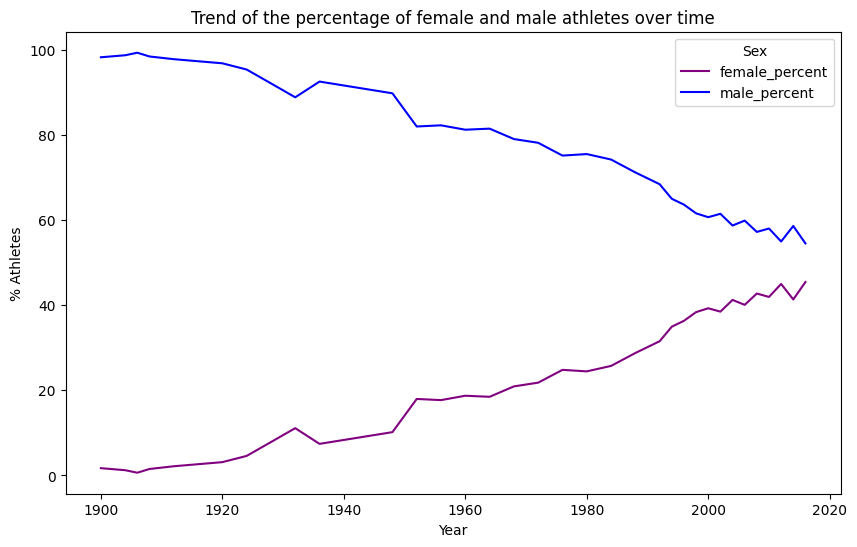

In [22]:
ax = counts[['female_percent', 'male_percent']].plot(kind='line', figsize=(10, 6), color=['purple', 'blue'])
ax.set_xlabel('Year')
ax.set_ylabel('% Athletes')
ax.set_title('Trend of the percentage of female and male athletes over time')
plt.show()

In [23]:
merged_df['Games'] = merged_df['Games'].str.replace('\d{4} ', '')
merged_df.head()

C:\Users\Chise\AppData\Local\Temp\ipykernel_31392\943489102.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  merged_df['Games'] = merged_df['Games'].str.replace('\d{4} ', '')


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands


In [ ]:
# Compare and contrast the summer and the winter games

In [ ]:
# How many athletes compete?

In [25]:
summer_df = merged_df[merged_df['Season'] == 'Summer']
winter_df = merged_df[merged_df['Season'] == 'Winter']

summer_counts = summer_df.groupby('Year')['ID'].count()
winter_counts = winter_df.groupby('Year')['ID'].count()

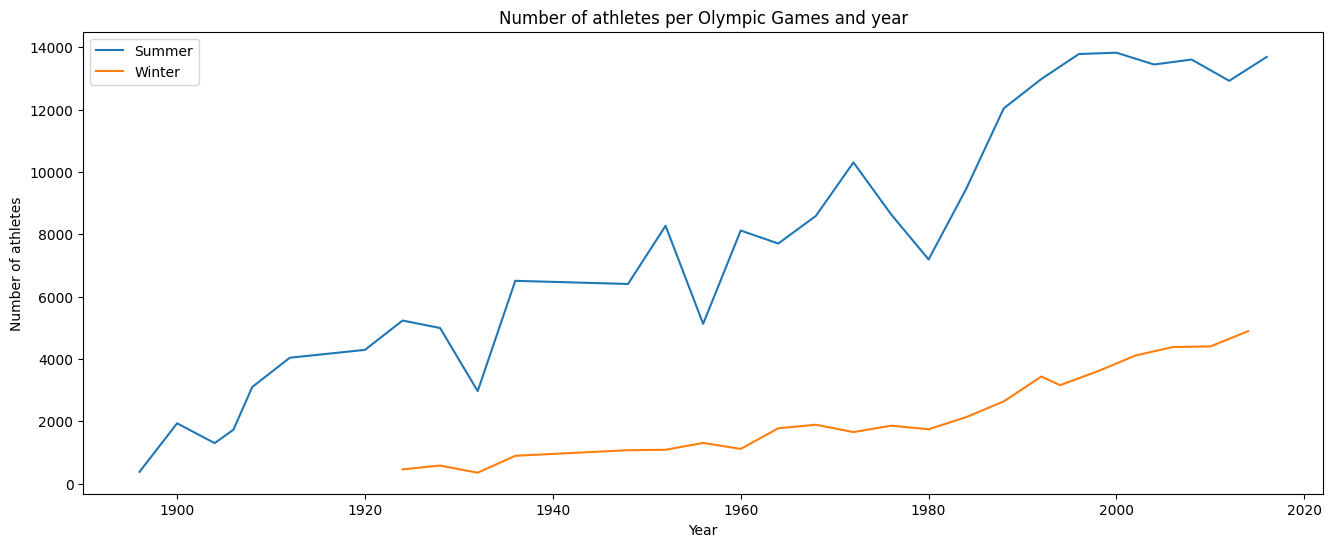

In [26]:
plt.figure(figsize=(16, 6))

plt.plot(summer_counts.index, summer_counts.values, label='Summer')
plt.plot(winter_counts.index, winter_counts.values, label='Winter')

plt.legend()
plt.title('Number of athletes per Olympic Games and year')
plt.xlabel('Year')
plt.ylabel('Number of athletes')

plt.show()

In [ ]:
# How many countries compete?

In [204]:
summer_country_counts = summer_df.groupby('Year')['NOC'].nunique()
winter_country_counts = winter_df.groupby('Year')['NOC'].nunique()

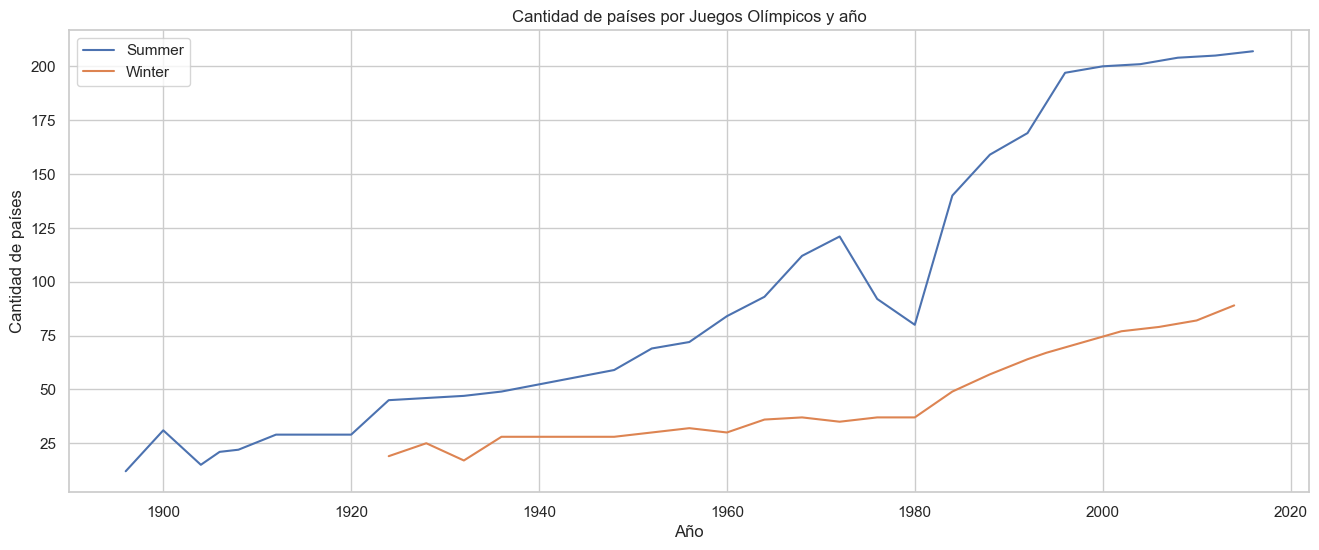

In [205]:
plt.figure(figsize=(16, 6))

plt.plot(summer_country_counts.index, summer_country_counts.values, label='Summer')
plt.plot(winter_country_counts.index, winter_country_counts.values, label='Winter')

plt.legend()
plt.title('Number of countries per Olympic Games and year')
plt.xlabel('Year')
plt.ylabel('Number of countries')

plt.show()

In [ ]:
# How many events are there?

In [27]:
summer_event_counts = summer_df.groupby('Year')['Event'].nunique()
winter_event_counts = winter_df.groupby('Year')['Event'].nunique()

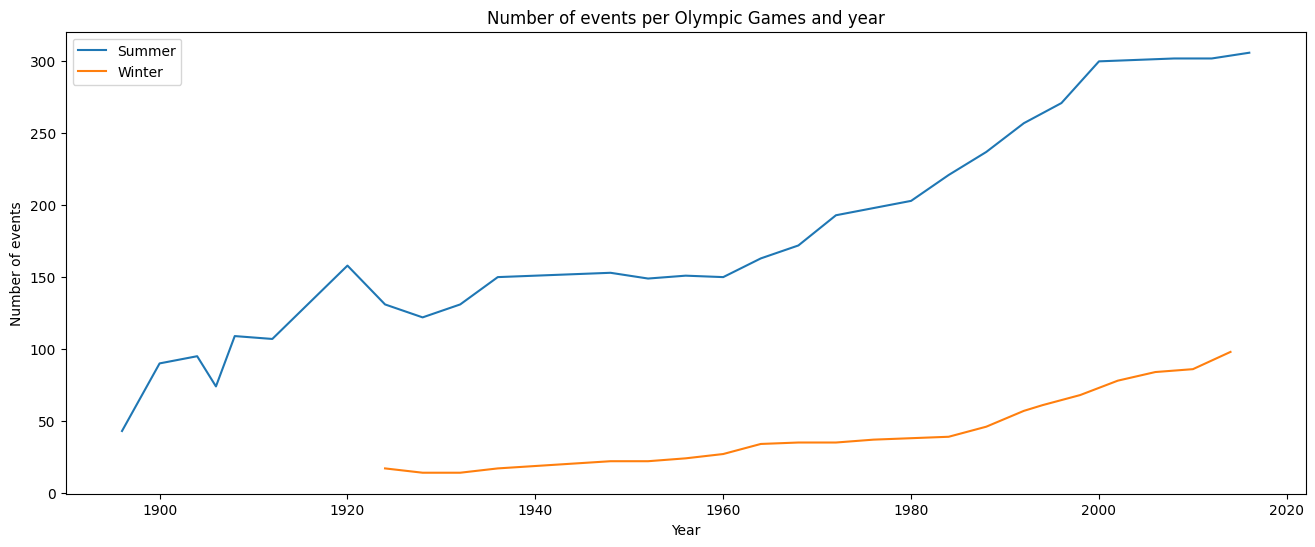

In [28]:
plt.figure(figsize=(16, 6))

plt.plot(summer_event_counts.index, summer_event_counts.values, label='Summer')
plt.plot(winter_event_counts.index, winter_event_counts.values, label='Winter')

plt.legend()
plt.title('Number of events per Olympic Games and year')
plt.xlabel('Year')
plt.ylabel('Number of events')

plt.show()

In [ ]:
# Analyze and visualize country-level trends

In [ ]:
# Which countries send the most athletes to the olympics?

In [29]:
country_counts = merged_df.groupby('NOC')['Name'].nunique()
top_countries = country_counts.sort_values(ascending=False)[:10]

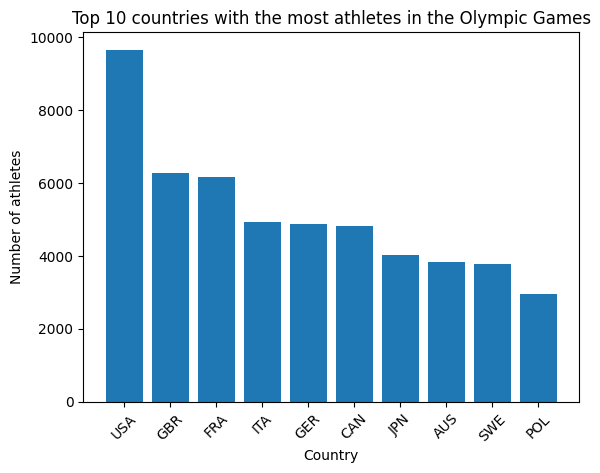

In [31]:
plt.bar(top_countries.index, top_countries.values)

plt.title('Top 10 countries with the most athletes in the Olympic Games')
plt.xlabel('Country')
plt.ylabel('Number of athletes')

plt.xticks(rotation=45)

plt.show()

In [ ]:
# Do they also tend to win the most medals?

In [32]:
athletes_by_country = athletes_df.groupby(['NOC', 'Year', 'Season'])['ID'].nunique().reset_index()
athletes_by_country = athletes_by_country.rename(columns={'ID': 'Num Athletes'})
max_athletes = athletes_by_country.groupby(['NOC', 'Season','Year'])['Num Athletes'].max().reset_index()

top_n_countries = 10 # Por ejemplo, analizamos los 10 países que envían más atletas
top_athlete_countries = max_athletes.groupby('Season').apply(lambda x: x.nlargest(top_n_countries, 'Num Athletes')).reset_index(drop=True)

In [33]:
medals_by_country = athletes_df.groupby(['NOC', 'Year', 'Season'])['Medal'].apply(lambda x: x[x != 'NA'].count()).reset_index(name='Num Medals')
max_medals = medals_by_country.groupby(['NOC', 'Season','Year'])['Num Medals'].max().reset_index()
top_medal_countries = max_medals.groupby('Season').apply(lambda x: x.nlargest(top_n_countries, 'Num Medals')).reset_index(drop=True)


In [37]:
medals_df = merged_df[merged_df['Medal'].notnull()]
medals_df = medals_df.drop(medals_df[medals_df == 'NA'].dropna(how='all').index)
medals_df.dropna(subset=['Medal'], inplace=True)
medals_by_country = medals_df.groupby('region')['Medal'].count()
top_countries = medals_by_country.sort_values(ascending=False).head(10)

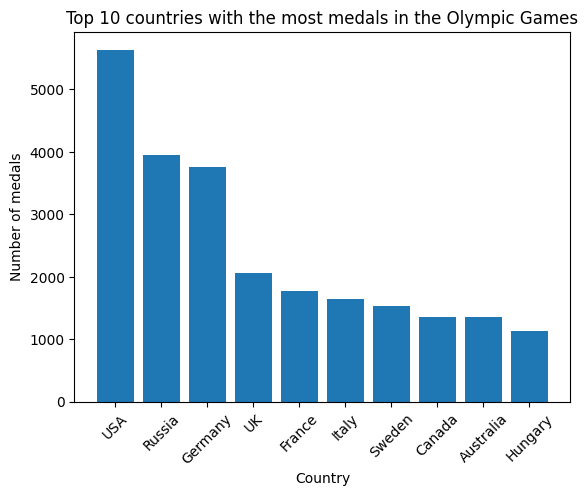

In [38]:
plt.bar(top_countries.index, top_countries.values)
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Number of medals')
plt.title('Top 10 countries with the most medals in the Olympic Games')
plt.show()

In [ ]:
# How have these trends changed over time?

In [39]:
top_10_countries = medals_df.groupby('NOC')['Medal'].count().nlargest(10).index.tolist()
medals_top_10 = medals_df[medals_df['NOC'].isin(top_10_countries)]

medals_pivot = medals_top_10.pivot_table(values='Medal', index='Year', columns='NOC', aggfunc='count')

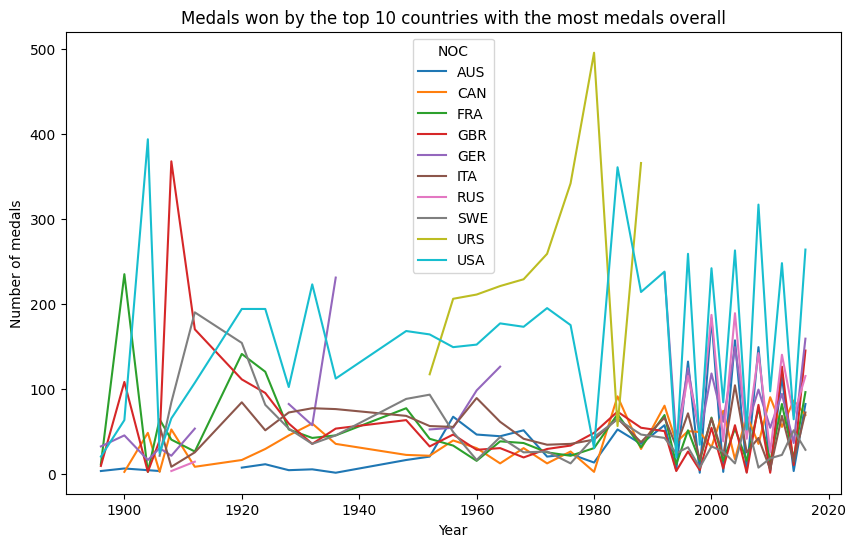

In [41]:
medals_pivot.plot(kind='line', figsize=(10, 6))

plt.title('Medals won by the top 10 countries with the most medals overall')
plt.xlabel('Year')
plt.ylabel('Number of medals')

plt.show()

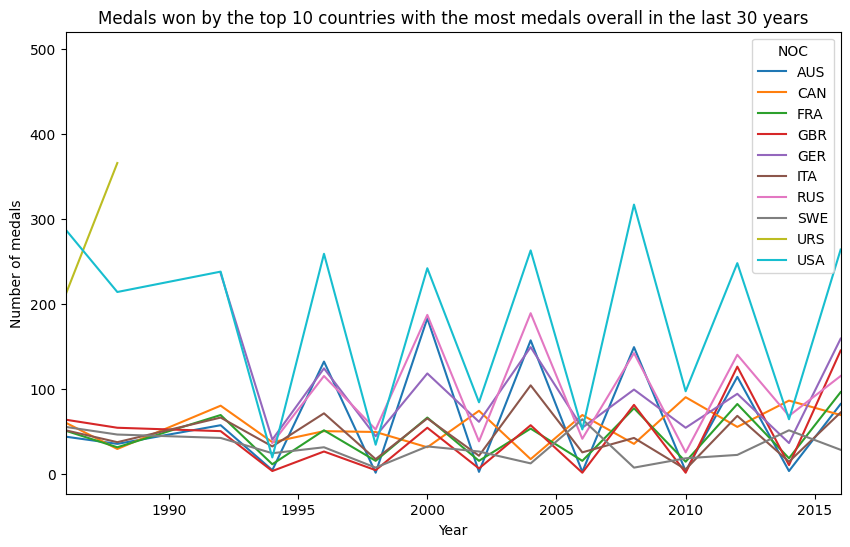

In [48]:
ax = medals_pivot.plot(kind='line', figsize=(10, 6))
plt.xlim(1986, 2016)

ax.set_title('Medals won by the top 10 countries with the most medals overall in the last 30 years')
ax.set_xlabel('Year')
ax.set_ylabel('Number of medals')

plt.show()

In [ ]:
# Medal count for each country in every sport

In [51]:
import seaborn as sns

In [52]:
top_countries = medals_df.groupby('region')['Medal'].count().nlargest(20).index.tolist()
top_sports = medals_df.groupby('Sport')['Medal'].count().nlargest(20).index.tolist()

medals_pivot = medals_df.pivot_table(values='Medal', index='region', columns='Sport', aggfunc='count')
medals_pivot = medals_pivot.loc[top_countries, top_sports]

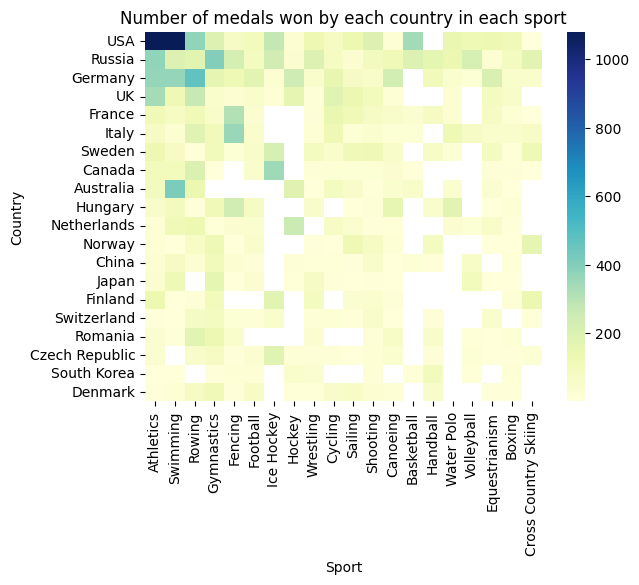

In [53]:
sns.heatmap(medals_pivot, cmap='YlGnBu')

plt.title('Number of medals won by each country in each sport (top 20)')
plt.xlabel('Sport')
plt.ylabel('Country')
plt.show()

In [ ]:
# Breakdown of age groups per sport

In [54]:
top_15_sports = merged_df.groupby('Sport')['Medal'].count().nlargest(15).index.tolist()
sports_top_15 = merged_df[merged_df['Sport'].isin(top_15_sports)]

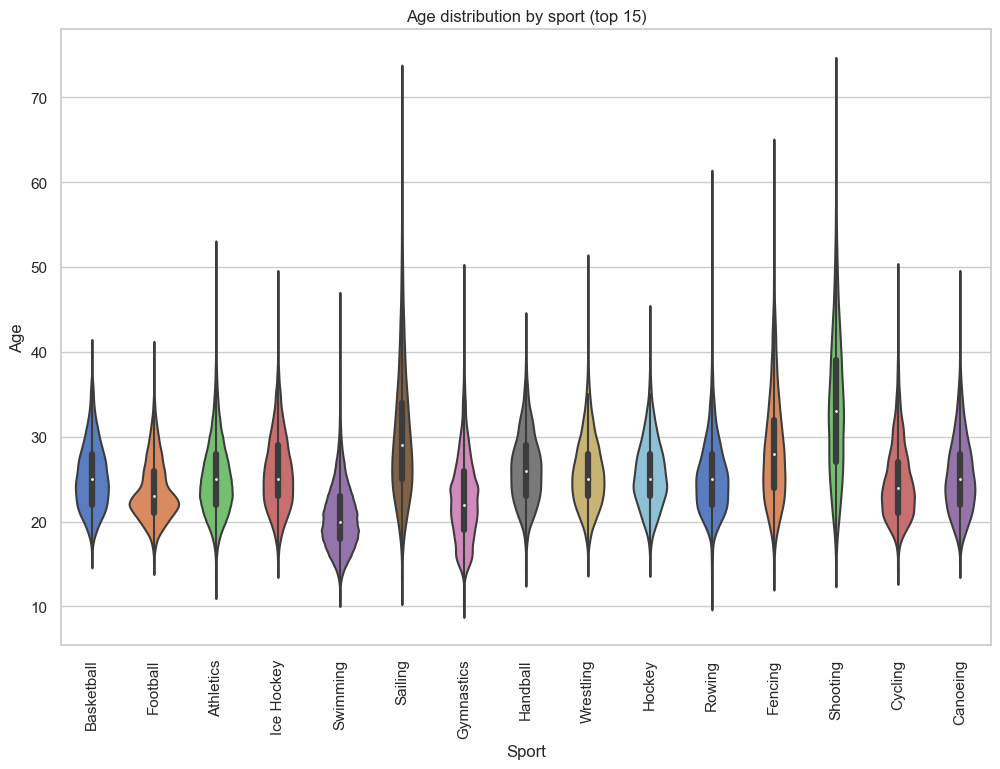

In [55]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(12, 8))
sns.violinplot(x="Sport", y="Age", data=sports_top_15, palette="muted")

plt.xticks(rotation=90)

plt.title("Age distribution by sport (top 15)")
plt.xlabel("Sport")
plt.ylabel("Age")
plt.show()

In [ ]:
# Most popular locations for hosting the Olympic Games

In [59]:
import folium

In [60]:
merged_df.dropna(subset=['City'], inplace=True)
cities_df = pd.read_csv('worldcities.csv', usecols=['city', 'lat', 'lng'])

olympic_cities_df = merged_df[['City']].drop_duplicates()
olympic_cities_df = pd.merge(olympic_cities_df, cities_df, left_on='City', right_on='city', how='left')

olympic_cities_df.drop(columns='city', inplace=True)
olympic_cities_df.dropna(subset=['lat', 'lng'], inplace=True)

In [72]:
m = folium.Map(location=[50, 10], zoom_start=4)

for index, row in olympic_cities_df.iterrows():
    folium.Marker([row['lat'], row['lng']], popup=row['City']).add_to(m)
m

In [67]:
from folium.plugins import HeatMap

In [68]:
m = folium.Map(location=[0, 0], zoom_start=2)
city_counts = merged_df["City"].value_counts().to_dict()



In [69]:
heat_layer = folium.FeatureGroup(name="Heatmap")

weights = [city_counts.get(city, 0) for city in olympic_cities_df["City"].tolist()]



In [70]:
heat_map = folium.plugins.HeatMap(
    data=list(zip(olympic_cities_df['lat'], olympic_cities_df['lng'], weights)),
    name="Heatmap"
)

heat_map.add_to(heat_layer)


In [71]:
heat_layer.add_to(m)
folium.LayerControl().add_to(m)
m